# Lección 2: Preparación

### Ejercicios de pair programming 27 de enero.

In [38]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [39]:
#abrimos el df con las columnas ya limpias
df = pd.read_csv("datos/airline_eda.csv", index_col=0).reset_index(drop = True)
df.head()

,satisfaction,gender,customer_type,age,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,...,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,distance
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,0,0,0,2,...,3,3,0,3,5,3,2,0,0,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,0,0,0,3,...,3,4,4,4,2,3,2,310,305,0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,0,0,0,3,...,2,3,3,4,4,4,2,0,0,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,0,0,0,3,...,1,1,0,1,4,1,3,0,0,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,0,0,0,3,...,2,2,0,2,4,2,5,0,0,0


#### 1. Estandarización.

In [40]:
#sacamos un df con las columnas numericas
df_num = df.select_dtypes(include=np.number)
df_num.columns

Index(['age', 'seat_comfort', 'departure/arrival_time_convenient',
       'food_and_drink', 'gate_location', 'inflight_wifi_service',
       'inflight_entertainment', 'online_support', 'ease_of_online_booking',
       'on-board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'cleanliness', 'online_boarding',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes', 'distance'],
      dtype='object')

Utilizaremos el RobustScaler ya que hemos decidido mantener los outliers

In [41]:
robust = RobustScaler()

In [42]:
robust.fit(df_num)

RobustScaler()

In [43]:
X_robust = robust.transform(df_num)

In [44]:
numericas_robust = pd.DataFrame(X_robust, columns = df_num.columns)
numericas_robust.head(2)

,age,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,distance
0,1.041667,-1.5,-1.5,-1.5,-0.5,-0.5,0.0,-1.0,-0.333333,-1.0,-1.333333,-0.5,2.0,-0.5,-1.0,0.000000,0.000000,0.0
1,0.291667,-1.5,-1.5,-1.5,0.0,-1.5,-1.0,-1.0,-0.333333,0.0,0.000000,0.0,-1.0,-0.5,-1.0,25.833333,23.461538,0.0


In [45]:
for columna in numericas_robust.columns:
    print(f'La media de la columna {columna} es:  {numericas_robust[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_robust[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna age es:  -0.023835142695821786
La desviación estándar de la columna age es: 0.6299733312653976
-------------------------------------------------------------
La media de la columna seat_comfort es:  -0.08070141669233138
La desviación estándar de la columna seat_comfort es: 0.6964916216345249
-------------------------------------------------------------
La media de la columna departure/arrival_time_convenient es:  -0.004677394518016631
La desviación estándar de la columna departure/arrival_time_convenient es: 0.7636121851729799
-------------------------------------------------------------
La media de la columna food_and_drink es:  -0.0740029257776409
La desviación estándar de la columna food_and_drink es: 0.7218646932867699
-------------------------------------------------------------
La media de la columna gate_location es:  -0.0047890360332614726
La desviación estándar de la columna gate_location es: 0.6529849469925355
--------------------------------------------

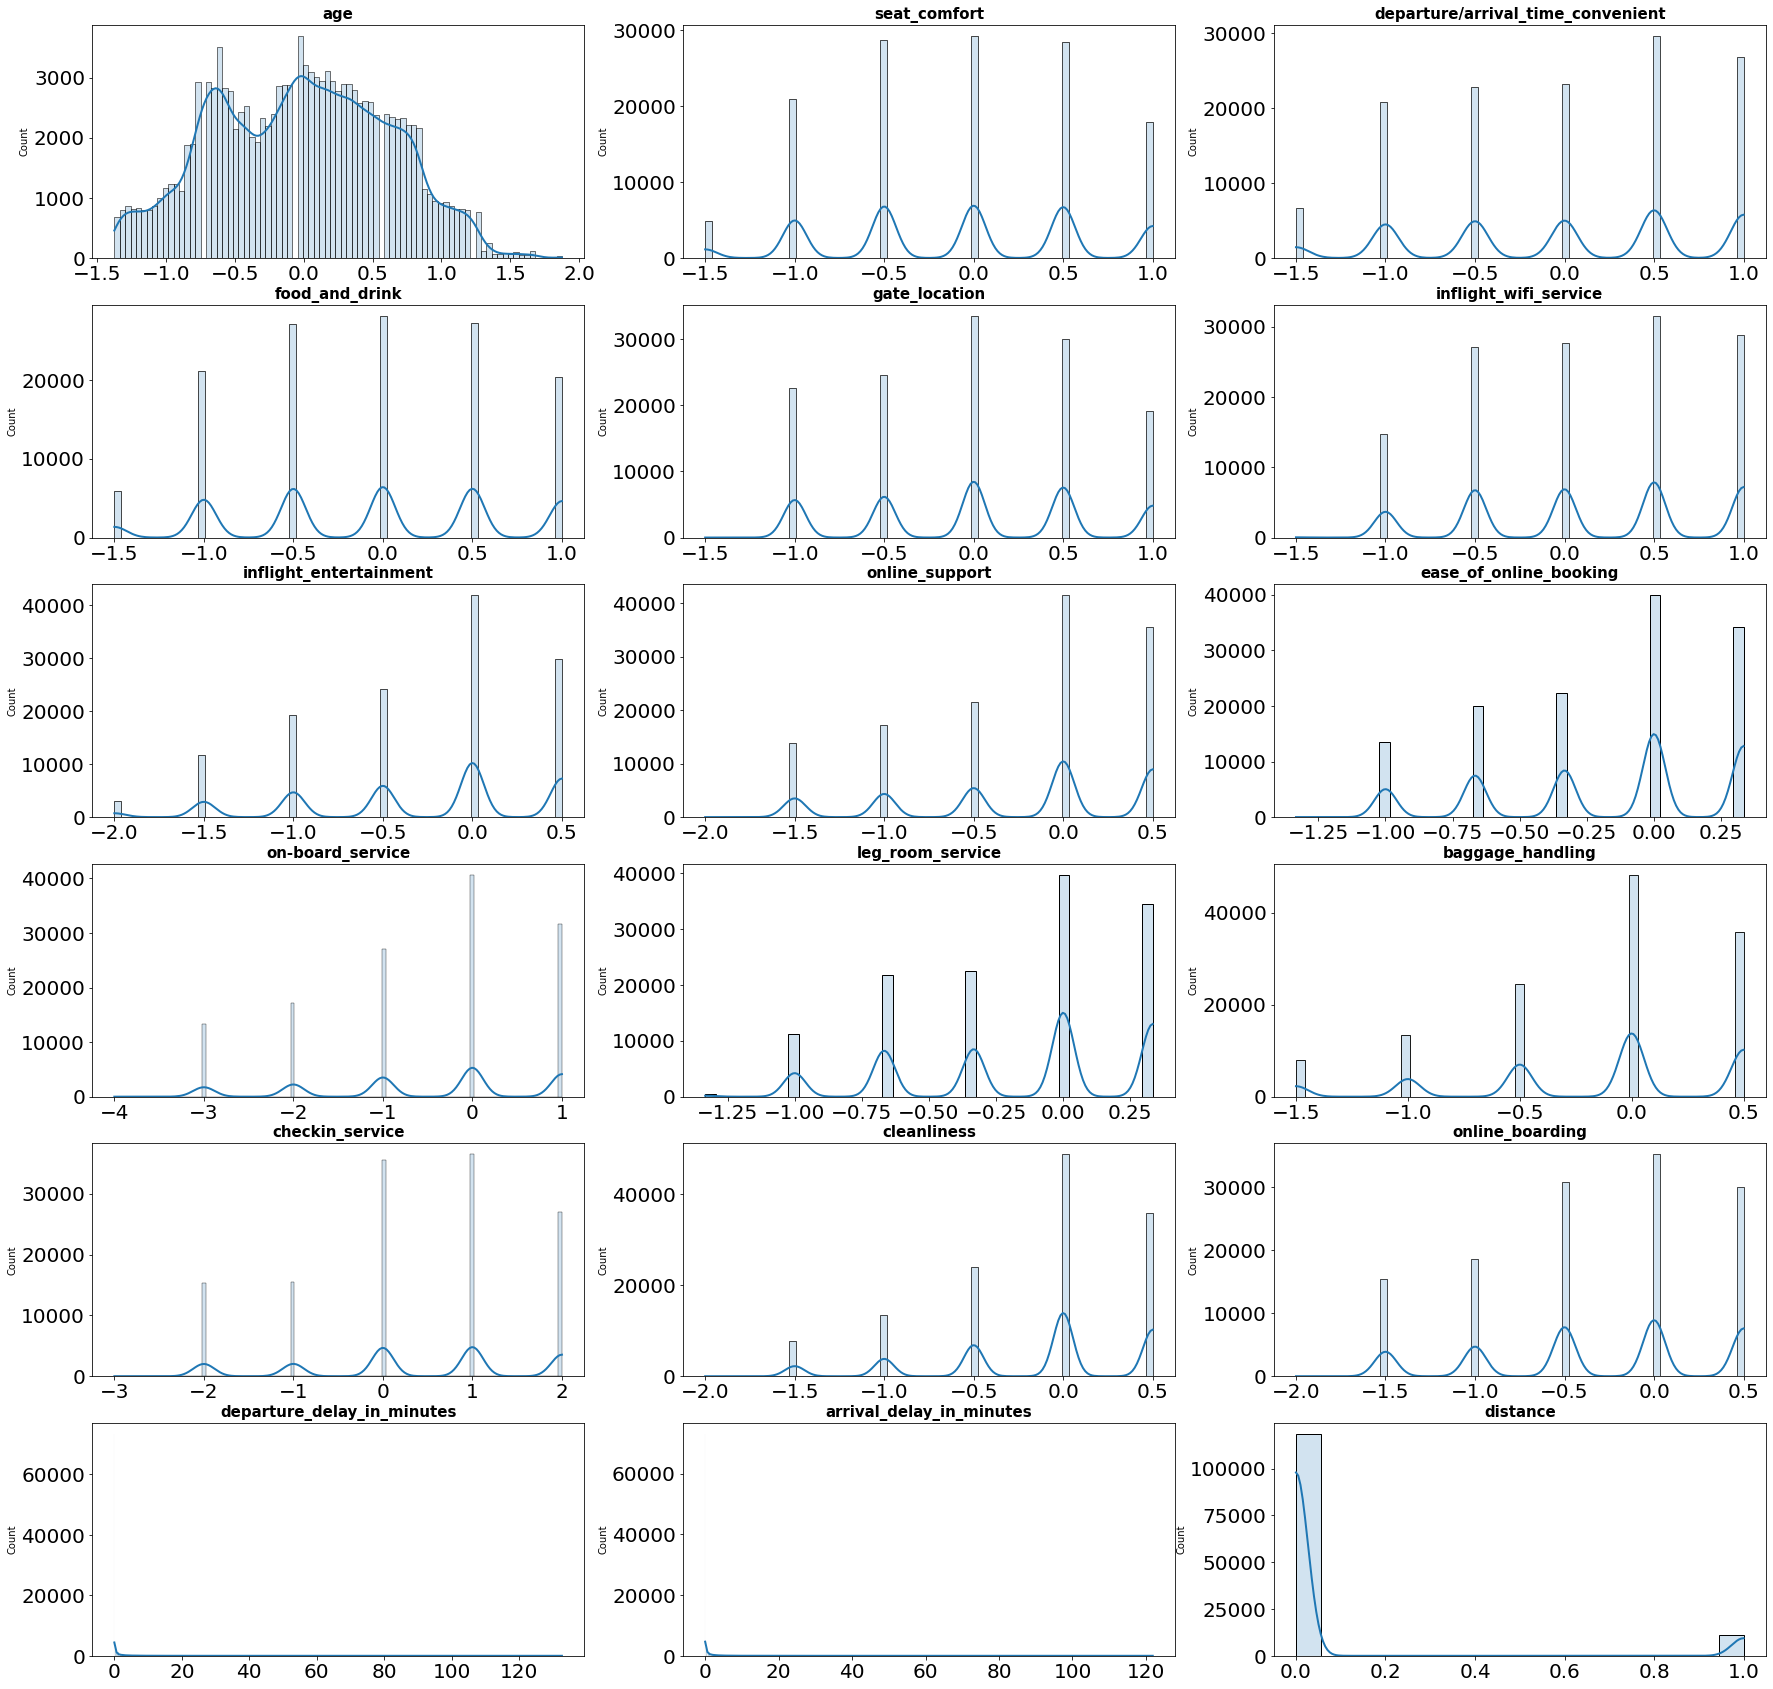

In [46]:
fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (30, 30))

columnas_robust = numericas_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_robust): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

In [47]:
df[numericas_robust.columns] = numericas_robust   #cambiamos las columnas numericas por las estandarizadas
df.head()

,satisfaction,gender,customer_type,age,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,...,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,distance
0,satisfied,Female,Loyal Customer,1.041667,Personal Travel,Eco,-1.5,-1.5,-1.5,-0.5,...,-0.333333,-1.0,-1.333333,-0.5,2.0,-0.5,-1.0,0.000000,0.000000,0.0
1,satisfied,Male,Loyal Customer,0.291667,Personal Travel,Business,-1.5,-1.5,-1.5,0.0,...,-0.333333,0.0,0.000000,0.0,-1.0,-0.5,-1.0,25.833333,23.461538,0.0
2,satisfied,Female,Loyal Customer,-1.041667,Personal Travel,Eco,-1.5,-1.5,-1.5,0.0,...,-0.666667,-1.0,-0.333333,0.0,1.0,0.0,-1.0,0.000000,0.000000,0.0
3,satisfied,Female,Loyal Customer,0.833333,Personal Travel,Eco,-1.5,-1.5,-1.5,0.0,...,-1.000000,-3.0,-1.333333,-1.5,1.0,-1.5,-0.5,0.000000,0.000000,0.0
4,satisfied,Female,Loyal Customer,1.250000,Personal Travel,Eco,-1.5,-1.5,-1.5,0.0,...,-0.666667,-2.0,-1.333333,-1.0,1.0,-1.0,0.5,0.000000,0.000000,0.0


#### 2. Codificación.

In [48]:
df_cat = df.select_dtypes(include="O")   #sacamos las columnas categoricas para hacer la codificacion
df_cat.columns

Index(['satisfaction', 'gender', 'customer_type', 'type_of_travel', 'class'], dtype='object')

In [49]:
df['satisfaction'].unique()   #comprobamos los valor que contiene cada columna categorica

array(['satisfied', 'dissatisfied'], dtype=object)

In [50]:
df['customer_type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [51]:
df['type_of_travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [52]:
df['class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [53]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

Como nuestras variables tienen orden usaremos map para codificarlas

In [54]:
#hacemos los mapas con los nuevos valores que queremos cambiar en cada columna 

map_satis = {"satisfied":1, 'dissatisfied': 0}
map_gen = {"Female":1, 'Male': 0}
map_class = {"Eco":0, 'Eco Plus': 1, "Business": 2}
map_custom = {"Loyal Customer":1, 'disloyal Customer': 0}
map_type = {"Personal Travel":1, 'Business travel': 0}

In [55]:
# y los aplicamos
df['satisfaction'] = df['satisfaction'].map(map_satis)
df.head(2)

,satisfaction,gender,customer_type,age,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,...,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,distance
0,1,Female,Loyal Customer,1.041667,Personal Travel,Eco,-1.5,-1.5,-1.5,-0.5,...,-0.333333,-1.0,-1.333333,-0.5,2.0,-0.5,-1.0,0.000000,0.000000,0.0
1,1,Male,Loyal Customer,0.291667,Personal Travel,Business,-1.5,-1.5,-1.5,0.0,...,-0.333333,0.0,0.000000,0.0,-1.0,-0.5,-1.0,25.833333,23.461538,0.0


In [56]:
df['gender'] = df['gender'].map(map_gen)
df.head(2)

,satisfaction,gender,customer_type,age,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,...,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,distance
0,1,1,Loyal Customer,1.041667,Personal Travel,Eco,-1.5,-1.5,-1.5,-0.5,...,-0.333333,-1.0,-1.333333,-0.5,2.0,-0.5,-1.0,0.000000,0.000000,0.0
1,1,0,Loyal Customer,0.291667,Personal Travel,Business,-1.5,-1.5,-1.5,0.0,...,-0.333333,0.0,0.000000,0.0,-1.0,-0.5,-1.0,25.833333,23.461538,0.0


In [57]:
df['customer_type'] = df['customer_type'].map(map_custom)
df.head(2)

,satisfaction,gender,customer_type,age,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,...,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,distance
0,1,1,1,1.041667,Personal Travel,Eco,-1.5,-1.5,-1.5,-0.5,...,-0.333333,-1.0,-1.333333,-0.5,2.0,-0.5,-1.0,0.000000,0.000000,0.0
1,1,0,1,0.291667,Personal Travel,Business,-1.5,-1.5,-1.5,0.0,...,-0.333333,0.0,0.000000,0.0,-1.0,-0.5,-1.0,25.833333,23.461538,0.0


In [58]:
df['type_of_travel'] = df['type_of_travel'].map(map_type)
df.head(2)

,satisfaction,gender,customer_type,age,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,...,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,distance
0,1,1,1,1.041667,1,Eco,-1.5,-1.5,-1.5,-0.5,...,-0.333333,-1.0,-1.333333,-0.5,2.0,-0.5,-1.0,0.000000,0.000000,0.0
1,1,0,1,0.291667,1,Business,-1.5,-1.5,-1.5,0.0,...,-0.333333,0.0,0.000000,0.0,-1.0,-0.5,-1.0,25.833333,23.461538,0.0


In [59]:
df['class'] = df['class'].map(map_class)
df.head(2)

,satisfaction,gender,customer_type,age,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,...,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,distance
0,1,1,1,1.041667,1,0,-1.5,-1.5,-1.5,-0.5,...,-0.333333,-1.0,-1.333333,-0.5,2.0,-0.5,-1.0,0.000000,0.000000,0.0
1,1,0,1,0.291667,1,2,-1.5,-1.5,-1.5,0.0,...,-0.333333,0.0,0.000000,0.0,-1.0,-0.5,-1.0,25.833333,23.461538,0.0


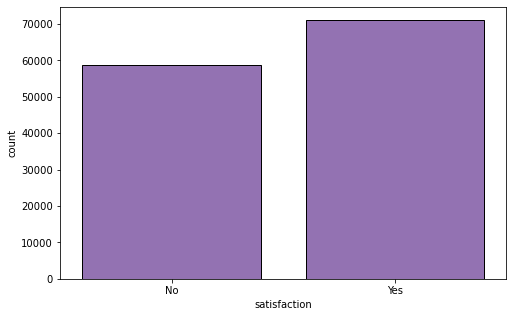

In [60]:
#comprobamos que nuestra variable respuesta no esta desbalanceada
plt.figure(figsize=(8,5)) 

fig1 = sns.countplot(data = df, x = "satisfaction",  color = "C4",  edgecolor='black')
fig1.set(xticklabels=["No", "Yes"]) 
plt.show()

In [61]:
# lo vemos también en porcentajes
df["satisfaction"].value_counts() / df.shape[0]

1    0.547328
0    0.452672
Name: satisfaction, dtype: float64

No tenemos que compensar el desbalanceo ya que en nuestro caso la variable respuesta esta 55%-45%

In [62]:
# guardamos la versión estandarizada y codificada

df.to_csv('datos/est_enc_airlines.csv')

In [63]:
#abrimos otra vez el df para hacer solo la codificacion y asi poder comparar
df2 = pd.read_csv("datos/airline_eda.csv", index_col=0).reset_index(drop = True)
df2.head()

,satisfaction,gender,customer_type,age,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,...,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,distance
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,0,0,0,2,...,3,3,0,3,5,3,2,0,0,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,0,0,0,3,...,3,4,4,4,2,3,2,310,305,0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,0,0,0,3,...,2,3,3,4,4,4,2,0,0,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,0,0,0,3,...,1,1,0,1,4,1,3,0,0,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,0,0,0,3,...,2,2,0,2,4,2,5,0,0,0


In [64]:
df2_cat = df2.select_dtypes(include="O")   #cogemos las columnas categoricas
df2_cat.columns

Index(['satisfaction', 'gender', 'customer_type', 'type_of_travel', 'class'], dtype='object')

Usamos map otra vez hacer la codificacion

In [65]:
map_satis = {"satisfied":1, 'dissatisfied': 0}
map_gen = {"Female":1, 'Male': 0}
map_class = {"Eco":0, 'Eco Plus': 1, "Business": 2}
map_custom = {"Loyal Customer":1, 'disloyal Customer': 0}
map_type = {"Personal Travel":1, 'Business travel': 0}

In [66]:
df2['satisfaction'] = df2['satisfaction'].map(map_satis)
df.head(2)

,satisfaction,gender,customer_type,age,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,...,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,distance
0,1,1,1,1.041667,1,0,-1.5,-1.5,-1.5,-0.5,...,-0.333333,-1.0,-1.333333,-0.5,2.0,-0.5,-1.0,0.000000,0.000000,0.0
1,1,0,1,0.291667,1,2,-1.5,-1.5,-1.5,0.0,...,-0.333333,0.0,0.000000,0.0,-1.0,-0.5,-1.0,25.833333,23.461538,0.0


In [67]:
df2['gender'] = df2['gender'].map(map_gen)
df.head(2)

,satisfaction,gender,customer_type,age,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,...,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,distance
0,1,1,1,1.041667,1,0,-1.5,-1.5,-1.5,-0.5,...,-0.333333,-1.0,-1.333333,-0.5,2.0,-0.5,-1.0,0.000000,0.000000,0.0
1,1,0,1,0.291667,1,2,-1.5,-1.5,-1.5,0.0,...,-0.333333,0.0,0.000000,0.0,-1.0,-0.5,-1.0,25.833333,23.461538,0.0


In [68]:
df2['customer_type'] = df2['customer_type'].map(map_custom)
df.head(2)

,satisfaction,gender,customer_type,age,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,...,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,distance
0,1,1,1,1.041667,1,0,-1.5,-1.5,-1.5,-0.5,...,-0.333333,-1.0,-1.333333,-0.5,2.0,-0.5,-1.0,0.000000,0.000000,0.0
1,1,0,1,0.291667,1,2,-1.5,-1.5,-1.5,0.0,...,-0.333333,0.0,0.000000,0.0,-1.0,-0.5,-1.0,25.833333,23.461538,0.0


In [69]:
df2['type_of_travel'] = df2['type_of_travel'].map(map_type)
df.head(2)

,satisfaction,gender,customer_type,age,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,...,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,distance
0,1,1,1,1.041667,1,0,-1.5,-1.5,-1.5,-0.5,...,-0.333333,-1.0,-1.333333,-0.5,2.0,-0.5,-1.0,0.000000,0.000000,0.0
1,1,0,1,0.291667,1,2,-1.5,-1.5,-1.5,0.0,...,-0.333333,0.0,0.000000,0.0,-1.0,-0.5,-1.0,25.833333,23.461538,0.0


In [70]:
df2['class'] = df2['class'].map(map_class)
df.head(2)

,satisfaction,gender,customer_type,age,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,...,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,distance
0,1,1,1,1.041667,1,0,-1.5,-1.5,-1.5,-0.5,...,-0.333333,-1.0,-1.333333,-0.5,2.0,-0.5,-1.0,0.000000,0.000000,0.0
1,1,0,1,0.291667,1,2,-1.5,-1.5,-1.5,0.0,...,-0.333333,0.0,0.000000,0.0,-1.0,-0.5,-1.0,25.833333,23.461538,0.0


In [71]:
#guardamos el df que tiene solo los datos codificados
df2.to_csv('datos/enc_airlines.csv')